# Sessie 4 - QR-ontbinding, eigenwaarden en -vectoren

Voer de onderstaande code uit.

In [1]:
import math
%matplotlib inline

import imageio.v3 as imageio
import matplotlib.pyplot as plt
import numpy as np

## Image Compression

Image compression is een methode om een figuur op een meer compacte manier voor te stellen om zo irrelevante informatie uit de figuur te verwijderen.

Aangezien de singuliere waarden ontbinding (SWO) van een arbitraire matrix ($A = U \Sigma V'$) ons orthogonale (dus niet-gecorreleerde) stukken informatie ($U$ en $V'$) met bijhorende impactfactoren ($\Sigma$) teruggeeft, kunnen we de belangrijkste delen informatie behouden en de rest verwijderen door de kleinste impactfactoren op $0$ te zetten.

Dit heet de lage-rang approximatie van een figuur.

## 1. QR-iteratie

Implementeer de QR-iteratie methode.

In [21]:
def qr_decomposition(A):
    """
    Compute the QR-decompositie of the matrix A.
    Output: Q, R
    """
    return np.linalg.qr(A)
    
def qr_iteration(A, n):
    """
    Run QR-iteratie on the matrix A for n iterations.
    Output: Q, R
    """
    Q = np.eye(A[0].size)
    for k in range(n):
        Q0, R = qr_decomposition(A)
        A = np.dot(R, Q0)
        Q = np.dot(Q, Q0)

    return Q, A

In [22]:
### TEST ###

# Compose symmetric matrix A'A
A = np.asmatrix([[1, 2, 3],[4, 5, 6],[7, 8, 7]])
A = np.dot(A.transpose(),A)
# Perform QR-iteration
Q, R = qr_iteration(A, 1000)
print("A'A = "); print(A)
print("QRQ' = "); print(np.dot(Q, np.dot(R, Q.transpose())))

# R moet een bovendriehoeksmatrix zijn en de diagonaal van R moet de eigenwaardes van de matrix A bevatten
print("R = "); print(R)
print("Eigenwaardes van R = "); print(np.linalg.eig(R)[0])

A'A = 
[[66 78 76]
 [78 93 92]
 [76 92 94]]
QRQ' = 
[[66. 78. 76.]
 [78. 93. 92.]
 [76. 92. 94.]]
R = 
[[ 2.49960091e+02  5.90541804e-16 -4.68170184e-15]
 [ 0.00000000e+00  2.99176945e+00  2.26515157e-15]
 [ 0.00000000e+00  0.00000000e+00  4.81397359e-02]]
Eigenwaardes van R = 
[2.49960091e+02 2.99176945e+00 4.81397359e-02]


## 2. Singuliere waarden ontbinding

Met behulp van QR-iteratie kan men de eigenwaarden en -vectoren berekenen van een <b>vierkante symmetrische</b> matrix $A$.
$$A = QRQ^T \Leftrightarrow AQ = QR$$
met $Q$ een unitaire matrix ($Q^T = Q^{-1}$) en $R$ een diagonaalmatrix met positieve elementen.<br>
De kolommen van $Q$ zijn de eigenvectoren, terwijl de diagonaalelementen van $R$ de bijhorende eigenwaarden geven.

Je kan met deze methode ook een singuliere waarden ontbinding (SWO) berekenen.<br>
Namelijk, $A = U \Sigma V^T$ met $U, V$ unitaire matrices en $\Sigma$ een diagonaal matrix met positieve elementen.

Implementeer een functie die de SWO berekent voor een matrix $A$ .

(Hint: Gegeven de matrix $A = U\Sigma V^T$, bereken $A^TA$. Wat kom je uit?)

In [60]:
def qr_svd(M):
    """
    Compute the Singular Value Decomposition (M = USV') using QR-iteration.
    Output: U, S, V
    """
    A2 = np.dot(M.transpose(), M)
    Q, R = qr_iteration(A2, 1000)
    V = Q
    S = np.diag(np.sqrt(np.diag(abs(R))))
    U = np.dot(np.dot(M, V), np.linalg.inv(S))
    return U, S, V

In [61]:
### TEST ###

# Compose arbitrary matrix A
A = 10*np.asmatrix([[1, 2, 3],[4, 5, 6],[7, 8, 7]])

# Perform SVD
U, S, V = qr_svd(A)
print("A = "); print(A)
print("USV' = ", ); print(np.dot(np.dot(U, S), V.transpose()))
print("-----")
print("U = ", ); print(U) # unitaire matrix
print("S = ", ); print(S) # diagonaal matrix
print("V = ", ); print(V) # unitaire matrix

A = 
[[10 20 30]
 [40 50 60]
 [70 80 70]]
USV' = 
[[10. 20. 30.]
 [40. 50. 60.]
 [70. 80. 70.]]
-----
U = 
[[ 0.22460336  0.67586599 -0.70196759]
 [ 0.55218544  0.5052748   0.6631656 ]
 [ 0.80289761 -0.5365655  -0.25971695]]
S = 
[[158.10126211   0.           0.        ]
 [  0.          17.29673222   0.        ]
 [  0.           0.           2.19407693]]
V = 
[[ 0.50939684 -0.61225053  0.6047017 ]
 [ 0.60931296 -0.23959327 -0.75586559]
 [ 0.60766156  0.75348812  0.25100413]]


## 3. Lage-Rang Approximatie

Lage-rang approximatie is een methode om een matrix te benaderen door de rang te verlagen.
Aangezien de rang van een matrix gelijk is aan het aantal singuliere waarden die niet nul zijn, kunnen we onze $\texttt{qr_svd}$ methode gebruiken om de SWO van de matrix te berekenen en enkel $k$ singuliere waarden (en vectoren) over te houden. Dit heet een k-rang approximatie van een matrix.

We kunnen dit gebruiken om bijvoorbeeld een figuur te comprimeren. Gegeven dat de $k$ hoogste eigenwaarden (met hun eigenvectoren) grotendeels de figuur bepalen, voer een k-rang approximatie uit op de figuur 'image.jpg' zodat zo weinig mogelijk informatie verloren gaat.

(Opmerking: Vergeet niet dat de eigen waarden in de matrix $R$ <b>niet</b> geordend zijn op grootte.)

In [66]:
def load_image(input_file):
    """
    Load the image from the given input file as a grayscale matrix.
    """
    return np.asmatrix(imageio.imread(input_file, mode='F'))  # Use mode='F' for floating-point grayscale

def remove_smallest_values(M, k):
    """
    Set the smallest elements to zero on the diagonal of M.
    Only keep the k largest values.
    """
    M = np.diag(M)
    values = list(enumerate(M))
    values.sort(key=lambda x: x[1], reverse=True)
    values[k:] = list(map(lambda x: (x[0], 0), values[k:]))
    values.sort(key=lambda x: x[0])
    return np.diag(list(zip(*values))[1])

def compress_image(M, k):
    """
    Computes the k-rank approximation of matrix M.
    """
    U, S, V = qr_svd(M)
    S = remove_smallest_values(S, k)

    return np.dot(np.dot(U, S), V.transpose())

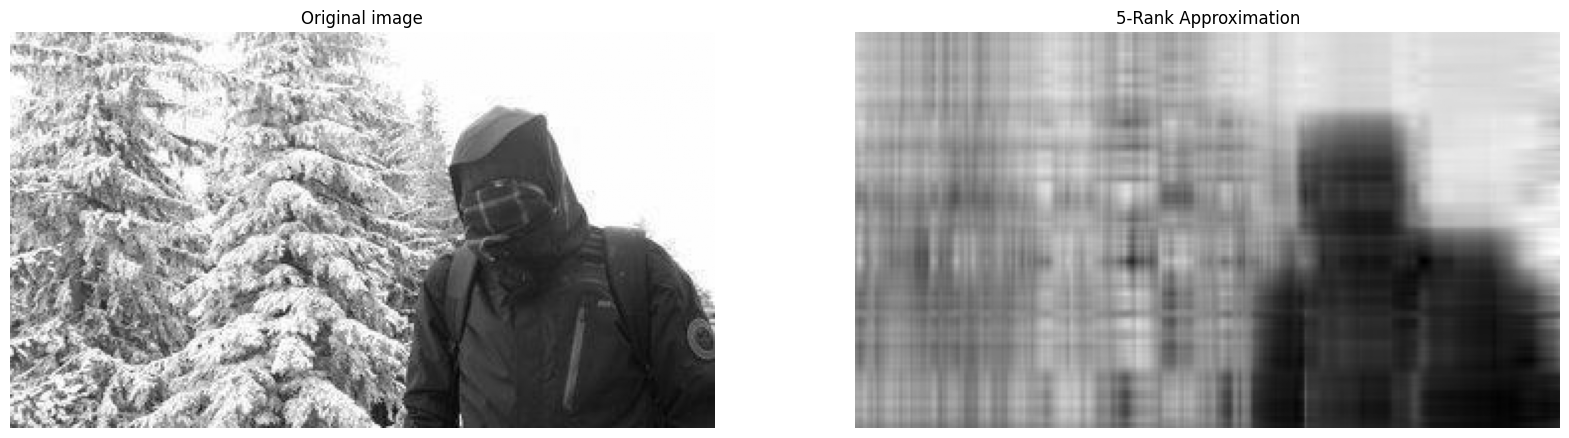

In [69]:
### TEST ###

# Parameters
k = 5 #Choose a rank for your k-rank approximation
input_file = 'image.jpg'
output_file = 'compressed_image.jpg'

# Compress the image2
img = load_image(input_file)
compressed_img = compress_image(img, k)

# Plot the image
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.axis('off')
plt.subplot(122)
plt.imshow(compressed_img, cmap=plt.cm.gray)
plt.title(str(k) + '-Rank Approximation')
plt.axis('off')
plt.show()